## 1. Getting Started: Airbnb Copenhagen

This assignment deals with the most recent Airbnb listings in Copenhagen. The data is collected from [Inside Airbnb](http://insideairbnb.com/copenhagen). Feel free to explore the website further in order to better understand the data. The data (*listings.csv*) has been collected as raw data and needs to be preprocessed.

**Hand-in:** Hand in as a group in Itslearning in a **single**, well-organized and easy-to-read Jupyter Notebook. If your group consists of students from different classes, upload in **both** classes.

1. First we need to remove all the redundant columns. Please keep the following 22 columns and remove all others:

    id\
    name  
    host_id  
    host_name  
    neighbourhood_cleansed  
    latitude  
    longitude  
    room_type  
    price  
    minimum_nights  
    number_of_reviews  
    last_review  
    review_scores_rating  
    review_scores_accuracy  
    review_scores_cleanliness  
    review_scores_checkin  
    review_scores_communication  
    review_scores_location  
    review_scores_value  
    reviews_per_month  
    calculated_host_listings_count  
    availability_365



2. Next we have to handle missing values. Remove all rows where `number_of_reviews = 0`. If there are still missing values, remove the rows that contain them so you have a data set with no missing values.

3. Fix the `neighbourhood_cleansed` values (some are missing 'æ ø å'), and if necessary change the price to DKK.

4. Create a fitting word cloud based on the `name` column. Feel free to remove non-descriptive stop words (e.g. since this is about Copenhagen, perhaps the word 'Copenhagen' is redundant).

5. Since data science is so much fun, provide a word cloud of the names of the hosts, removing any names of non-persons. Does this more or less correspond with the distribution of names according to [Danmarks Statistik](https://www.dst.dk/da/Statistik/emner/borgere/navne/navne-i-hele-befolkningen)?

6. Create a new column using bins of price. Use 11 bins, evenly distributed but with the last bin $> 10,000$.

7. Using non-scaled versions of latitude and longitude, plot the listings data on a map. Use the newly created price bins as a color parameter. Also, create a plot (i.e. another plot) where you group the listings with regard to the neighbourhood.

8. Create boxplots where you have the neighbourhood on the x-axis and price on the y-axis. What does this tell you about the listings in Copenhagen? Keep the x-axis as is and move different variables into the y-axis to see how things are distributed between the neighborhoods to create different plots (your choice).

9. Create a bar chart of the hosts with the top ten most listings. Place host id on the x-axis and the count of listings on the y-axis.

10. Do a descriptive analysis of the neighborhoods. Include information about room type in the analysis as well as one other self-chosen feature. The descriptive analysis should contain mean/average, mode, median, standard deviation/variance, minimum, maximum and quartiles.

11. Supply a list of the top 10 highest rated listings and visualize them on a map.

12. Now, use any preprocessing and feature engineering steps that you find relevant before proceeding (optional).

13. Create another new column, where the price is divided into two categories: "expensive" listings defined by all listings with a price higher than the median price, and "affordable" listings defined by all listings with a price equal to or below the median price. You can encode the affordable listings as "0" and the expensive ones as "1". All listings should now have a classification indicating either expensive listings (1) or affordable listings (0).

14. Based on self-chosen features, develop a Naïve Bayes and k-Nearest Neighbor model to determine whether a rental property should be classified as 0 or 1. Remember to divide your data into training data and test data. Comment on your findings.

15. Try to come up with a final conclusion to the Airbnb-Copenhagen assignment.


In [72]:
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

!pip install wordcloud
from wordcloud import WordCloud

import warnings; warnings.simplefilter('ignore')

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

1. First we need to remove all the redundant columns. Please keep the following 22 columns and remove all others:

    id\
    name  
    host_id  
    host_name  
    neighbourhood_cleansed  
    latitude  
    longitude  
    room_type  
    price  
    minimum_nights  
    number_of_reviews  
    last_review  
    review_scores_rating  
    review_scores_accuracy  
    review_scores_cleanliness  
    review_scores_checkin  
    review_scores_communication  
    review_scores_location  
    review_scores_value  
    reviews_per_month  
    calculated_host_listings_count  
    availability_365

In [73]:
import pandas as pd

data = pd.read_csv('listings.csv')
 
columns_to_keep = [
    'id',
    'name',
    'host_id',
    'host_name',
    'neighbourhood_cleansed',
    'latitude',
    'longitude',
    'room_type',
    'price',
    'minimum_nights',
    'number_of_reviews',
    'last_review',
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'
]

data = data[columns_to_keep]

data['price'] = data['price'].str.replace('$', '').str.replace(',', '').astype(float)

data.head(10)

,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365
0,6983,Copenhagen 'N Livin',16774,Simon,Nrrebro,55.686410,12.547410,Entire home/apt,898.0,3,...,4.78,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,2600.0,4,...,4.91,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,3250.0,3,...,4.53,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725.0,7,...,4.92,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954.0,3,...,4.88,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0
5,32379,"165 m2 artist flat on Vesterbro, with 2 bathr...",140105,Lise,Vesterbro-Kongens Enghave,55.672638,12.552493,Entire home/apt,1280.0,3,...,4.90,4.96,4.92,4.88,4.91,4.88,4.72,0.54,2,60
6,32841,Cozy flat for Adults/Quiet for kids,142143,Anders & Maria,sterbro,55.711760,12.570910,Entire home/apt,617.0,100,...,4.57,4.75,4.50,5.00,5.00,4.50,4.50,0.05,1,281
7,33680,Best location on Vesterbro/Cph,145671,Mette,Vesterbro-Kongens Enghave,55.666310,12.545550,Entire home/apt,1000.0,6,...,4.74,4.75,4.67,4.91,4.91,4.80,4.67,0.48,1,312
8,37159,Unique space on greatest location,160390,Jeanette,Indre By,55.685470,12.565430,Entire home/apt,2916.0,5,...,5.00,4.78,5.00,5.00,5.00,4.89,4.78,0.07,1,0
9,38499,0 min. from everything in Cph.,122489,Christina,Indre By,55.684288,12.573019,Entire home/apt,1900.0,14,...,5.00,4.56,4.89,5.00,5.00,5.00,4.89,0.10,1,87


2. Next we have to handle missing values. Remove all rows where `number_of_reviews = 0`. If there are still missing values, remove the rows that contain them so you have a data set with no missing values.

In [74]:
display("Data before adjustments: ", data.info())
display(data.describe())

data = data[data['number_of_reviews'] != 0]

data.dropna(inplace=True)

display("Data after adjustments: ", data.info())
display(data.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13815 entries, 0 to 13814
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13815 non-null  int64  
 1   name                            13815 non-null  object 
 2   host_id                         13815 non-null  int64  
 3   host_name                       13814 non-null  object 
 4   neighbourhood_cleansed          13815 non-null  object 
 5   latitude                        13815 non-null  float64
 6   longitude                       13815 non-null  float64
 7   room_type                       13815 non-null  object 
 8   price                           13815 non-null  float64
 9   minimum_nights                  13815 non-null  int64  
 10  number_of_reviews               13815 non-null  int64  
 11  last_review                     12170 non-null  object 
 12  review_scores_rating            

'Data before adjustments: '

None

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365
count,1.381500e+04,1.381500e+04,13815.000000,13815.000000,13815.000000,13815.000000,13815.000000,12170.000000,12127.000000,12127.000000,12127.00000,12127.000000,12126.000000,12127.000000,12170.000000,13815.000000,13815.000000
mean,1.719385e+17,1.064145e+08,55.680569,12.557805,1205.878972,4.605574,18.571118,4.787145,4.845338,4.692313,4.88394,4.905140,4.826399,4.720313,0.903816,4.400651,93.302642
std,2.852538e+17,1.302801e+08,0.021088,0.033512,1433.143149,16.900153,36.402671,0.400756,0.262619,0.394232,0.25234,0.235488,0.253852,0.308285,1.110754,21.298565,123.161958
min,6.983000e+03,1.171800e+04,55.609510,12.435670,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,1.907962e+07,1.356383e+07,55.666110,12.540285,729.000000,2.000000,2.000000,4.710000,4.800000,4.560000,4.86000,4.900000,4.750000,4.610000,0.230000,1.000000,0.000000
50%,3.931542e+07,4.656301e+07,55.681190,12.555520,995.000000,3.000000,7.000000,4.890000,4.930000,4.800000,4.98000,5.000000,4.900000,4.780000,0.530000,1.000000,20.000000
75%,5.665348e+17,1.553486e+08,55.695770,12.580741,1368.500000,4.000000,20.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,1.120000,1.000000,174.000000
max,7.222925e+17,4.805803e+08,55.742800,12.651740,64900.000000,1111.000000,711.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,24.020000,179.000000,365.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12126 entries, 0 to 13814
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              12126 non-null  int64  
 1   name                            12126 non-null  object 
 2   host_id                         12126 non-null  int64  
 3   host_name                       12126 non-null  object 
 4   neighbourhood_cleansed          12126 non-null  object 
 5   latitude                        12126 non-null  float64
 6   longitude                       12126 non-null  float64
 7   room_type                       12126 non-null  object 
 8   price                           12126 non-null  float64
 9   minimum_nights                  12126 non-null  int64  
 10  number_of_reviews               12126 non-null  int64  
 11  last_review                     12126 non-null  object 
 12  review_scores_rating            

'Data after adjustments: '

None

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365
count,1.212600e+04,1.212600e+04,12126.000000,12126.000000,12126.000000,12126.000000,12126.000000,12126.000000,12126.000000,12126.000000,12126.000000,12126.000000,12126.000000,12126.000000,12126.000000,12126.000000,12126.000000
mean,1.469716e+17,1.011950e+08,55.680638,12.558298,1155.454890,4.359970,21.152895,4.804020,4.845655,4.692618,4.884260,4.905462,4.826399,4.720620,0.907005,3.710374,88.129144
std,2.682035e+17,1.262784e+08,0.020763,0.033181,1236.666009,16.714475,38.147244,0.283435,0.260298,0.392819,0.249873,0.232811,0.253852,0.306441,1.111503,19.211000,119.400813
min,6.983000e+03,1.171800e+04,55.609510,12.435670,79.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,1.729672e+07,1.294026e+07,55.666254,12.541080,721.000000,2.000000,4.000000,4.710000,4.800000,4.560000,4.860000,4.900000,4.750000,4.610000,0.230000,1.000000,0.000000
50%,3.630308e+07,4.298586e+07,55.681275,12.555770,979.000000,3.000000,9.000000,4.890000,4.930000,4.800000,4.980000,5.000000,4.900000,4.780000,0.530000,1.000000,16.000000
75%,5.350174e+07,1.436026e+08,55.695535,12.580838,1329.000000,4.000000,23.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.120000,1.000000,158.000000
max,7.188292e+17,4.793598e+08,55.742800,12.651740,64900.000000,1111.000000,711.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,24.020000,179.000000,365.000000


3. Fix the `neighbourhood_cleansed` values (some are missing 'æ ø å'), and if necessary change the price to DKK.

In [75]:
# TODO Check
replacements = {
    'ae': 'æ',
    'oe': 'ø',
    'aa': 'å'
}

for idx, row in data.iterrows():
    text = row['neighbourhood_cleansed']
    for k, v in replacements.items():
        text = text.replace(k, v)
    data.at[idx, 'neighbourhood_cleansed'] = text

display(data)

,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365
0,6983,Copenhagen 'N Livin',16774,Simon,Nrrebro,55.686410,12.547410,Entire home/apt,898.0,3,...,4.78,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,2600.0,4,...,4.91,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,3250.0,3,...,4.53,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725.0,7,...,4.92,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954.0,3,...,4.88,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13808,646726550705810749,Ny rummelig lejlighed med tilhørende kat.,54229471,Morten,Brnshj-Husum,55.739028,12.487433,Entire home/apt,856.0,6,...,4.75,4.75,4.00,5.00,5.00,4.50,5.00,1.85,1,0
13809,646941499450912133,Big beautiful and charming apartment,141288846,Tanja,Bispebjerg,55.730481,12.521243,Entire home/apt,1050.0,2,...,5.00,4.50,5.00,5.00,5.00,4.75,5.00,1.64,2,0
13811,647809303952891559,Dejligt lille hus med flere hyggekroge ude og ...,4862421,Kathrine,Valby,55.667782,12.463285,Entire home/apt,450.0,3,...,5.00,5.00,5.00,5.00,5.00,4.67,5.00,1.01,1,0
13812,650819220455514228,Lejlighed i Storkøbenhavn. 13 minutter fra cen...,134647873,Tim,Valby,55.659536,12.474726,Entire home/apt,400.0,1,...,5.00,5.00,4.67,5.00,5.00,4.67,5.00,1.27,1,0


4. Create a fitting word cloud based on the `name` column. Feel free to remove non-descriptive stop words (e.g. since this is about Copenhagen, perhaps the word 'Copenhagen' is redundant).

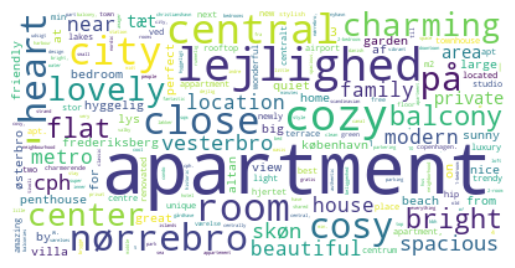

In [76]:
apartment_names = data["name"].str.lower().str.split(' ', expand=True).stack().str.strip().reset_index(drop=True)

filter_words = ["copenhagen", "with", "in", "the", "and", "to", "of", "²", "og", "&", "med", "2", "i", "a"]
apartment_names = apartment_names[~apartment_names.isin(filter_words)]

apartment_names = apartment_names.value_counts().to_dict()


wordcloud = WordCloud(background_color="white").generate_from_frequencies(apartment_names)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

5. Since data science is so much fun, provide a word cloud of the names of the hosts, removing any names of non-persons. Does this more or less correspond with the distribution of names according to [Danmarks Statistik](https://www.dst.dk/da/Statistik/emner/borgere/navne/navne-i-hele-befolkningen)?

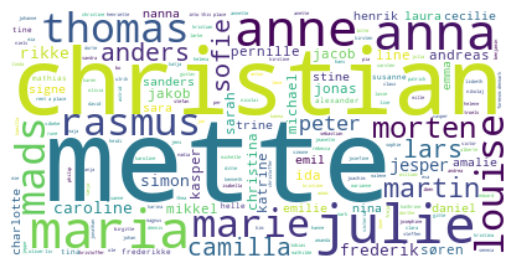

In [77]:
host_names = data['host_name'].str.lower().str.split('&', expand=True).stack().str.strip().reset_index(drop=True)

filter_words = ["apartmentincopenhagen"]
host_names = host_names[~host_names.isin(filter_words)]

name_freq = host_names.value_counts().to_dict()

wordcloud = WordCloud(background_color="white").generate_from_frequencies(name_freq)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


6. Create a new column using bins of price. Use 11 bins, evenly distributed but with the last bin $> 10,000$.

0    6.801283
1    7.863651
2    8.086718
3    6.587550
4    7.578145
5    7.155396
6    6.426488
7    6.908755
8    7.978311
9    7.550135
Name: log_price, dtype: float64


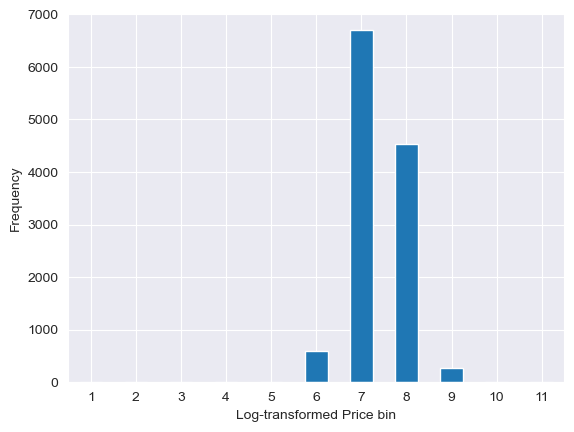

In [78]:
data["log_price"] = np.log1p(data["price"])

print(data["log_price"].head(10))

data["price_bin"] = pd.cut(data["log_price"],
                           bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, np.inf],
                           labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

data["price_bin"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Log-transformed Price bin")
plt.ylabel("Frequency")
plt.show()

7. Using non-scaled versions of latitude and longitude, plot the listings data on a map. Use the newly created price bins as a color parameter. Also, create a plot (i.e. another plot) where you group the listings with regard to the neighbourhood.

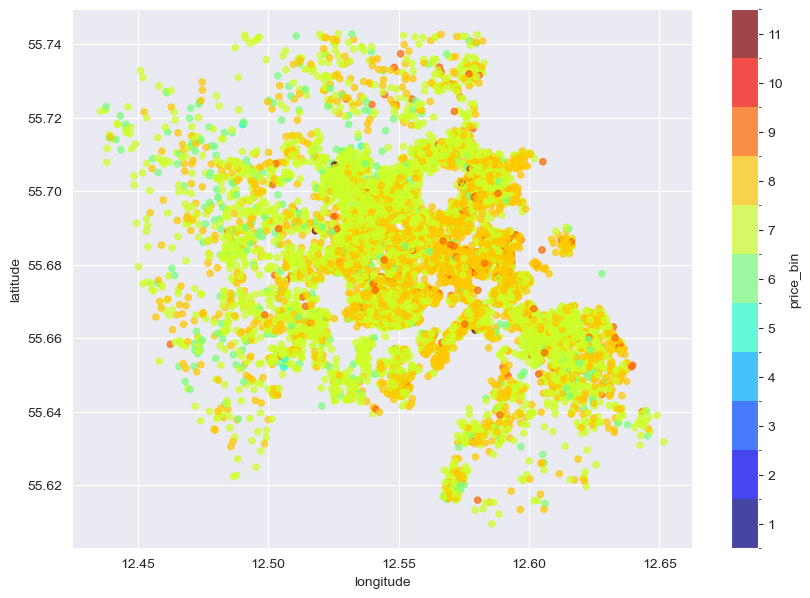

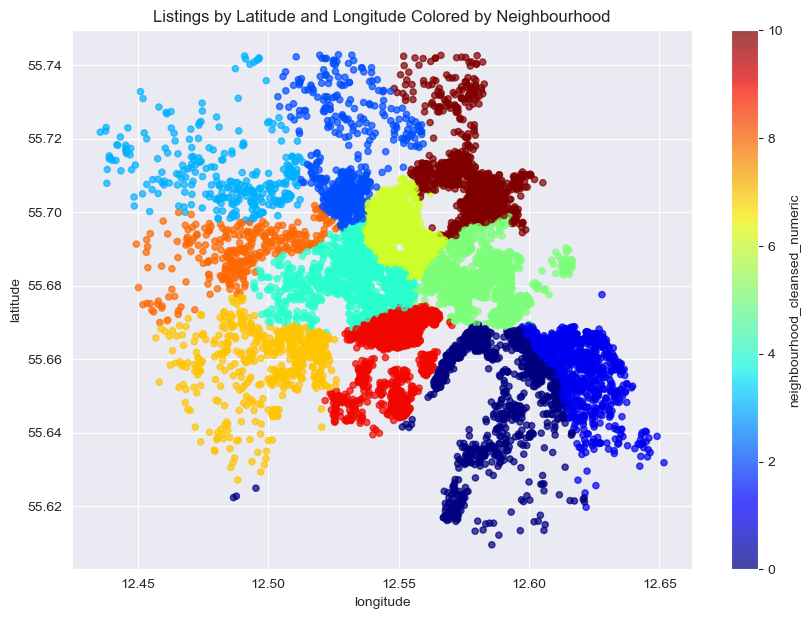

In [79]:
data.plot(kind="scatter", x="longitude", y="latitude", grid=True,alpha=0.7,
 c="price_bin",cmap="jet", colorbar=True,legend=True, sharex=False, figsize=(10, 7))
plt.show()


data['neighbourhood_cleansed_numeric'] = pd.Categorical(data['neighbourhood_cleansed']).codes
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.7,
          c="neighbourhood_cleansed_numeric", cmap="jet", colorbar=True, figsize=(10, 7))
plt.title('Listings by Latitude and Longitude Colored by Neighbourhood')
plt.show()

8. Create boxplots where you have the neighbourhood on the x-axis and price on the y-axis. What does this tell you about the listings in Copenhagen? Keep the x-axis as is and move different variables into the y-axis to see how things are distributed between the neighborhoods to create different plots (your choice).


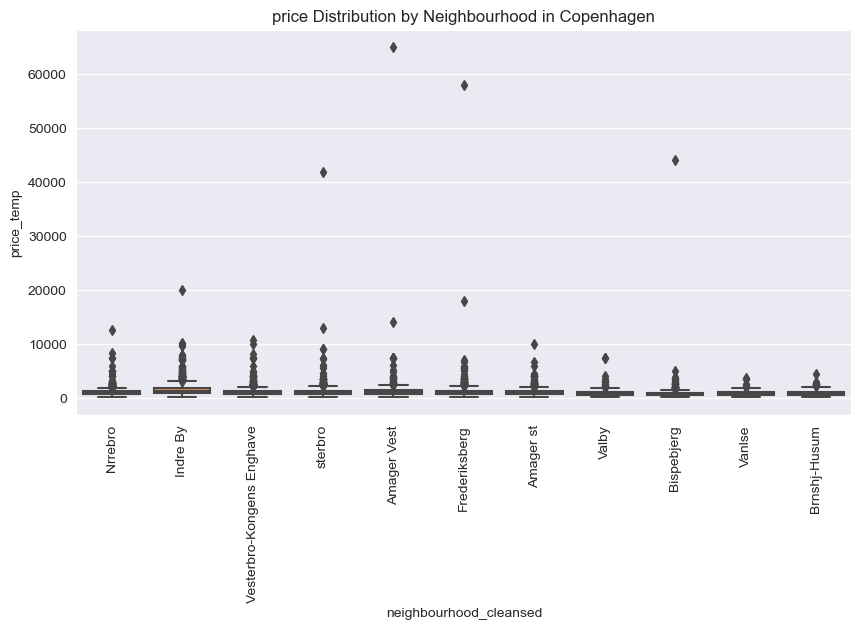

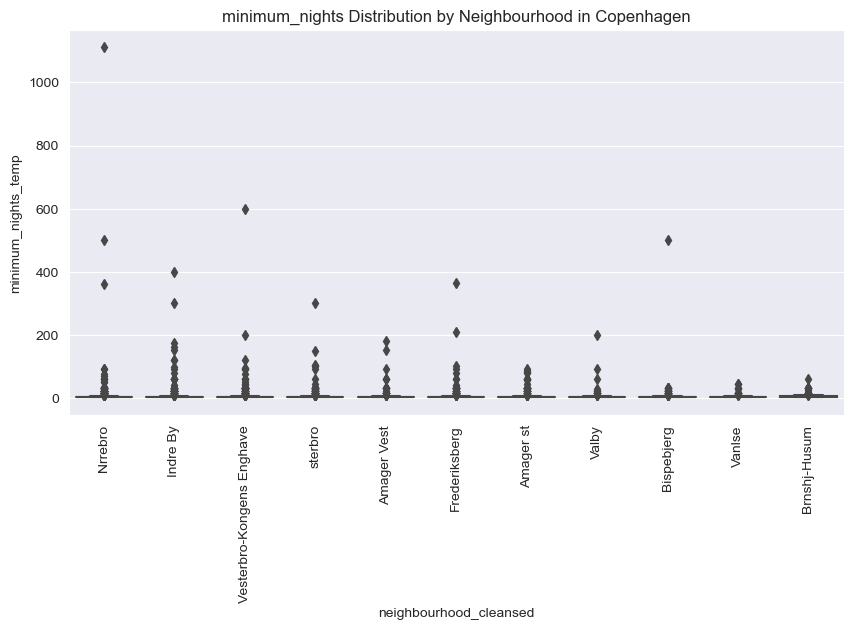

In [80]:
import seaborn as sns

def plotNeighbourByPrice(y):
    temp_col = y + '_temp'
    data[temp_col] = data[y]

    plt.figure(figsize=(10, 5))
    sns.boxplot(x="neighbourhood_cleansed", y=temp_col, data=data)
    plt.xticks(rotation=90)
    plt.title(y + ' Distribution by Neighbourhood in Copenhagen')
    plt.show()

plotNeighbourByPrice('price')
plotNeighbourByPrice('minimum_nights')

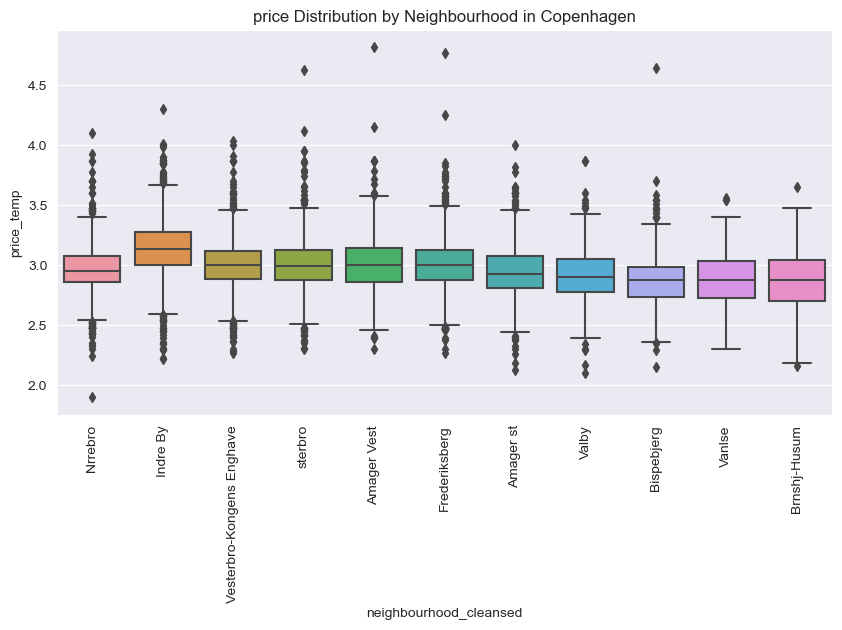

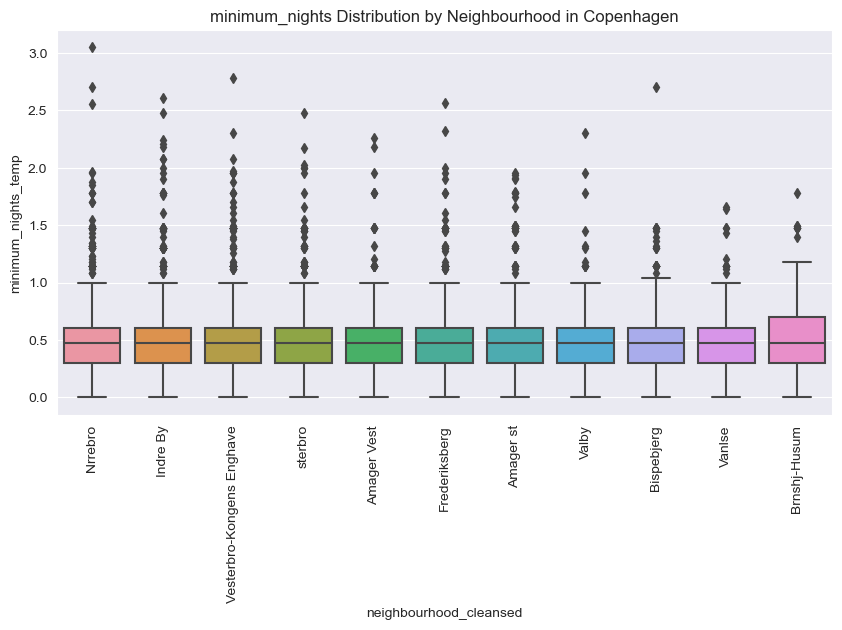

In [81]:
import seaborn as sns
data["price"] = np.log10(data["price"])
data["minimum_nights"] = np.log10(data["minimum_nights"])

def plotNeighbourByPrice(y):
    temp_col = y + '_temp'
    data[temp_col] = data[y]

    plt.figure(figsize=(10, 5))
    sns.boxplot(x="neighbourhood_cleansed", y=temp_col, data=data)
    plt.xticks(rotation=90)
    plt.title(y + ' Distribution by Neighbourhood in Copenhagen')
    plt.show()

plotNeighbourByPrice('price')
plotNeighbourByPrice('minimum_nights')

9. Create a bar chart of the hosts with the top ten most listings. Place host id on the x-axis and the count of listings on the y-axis.

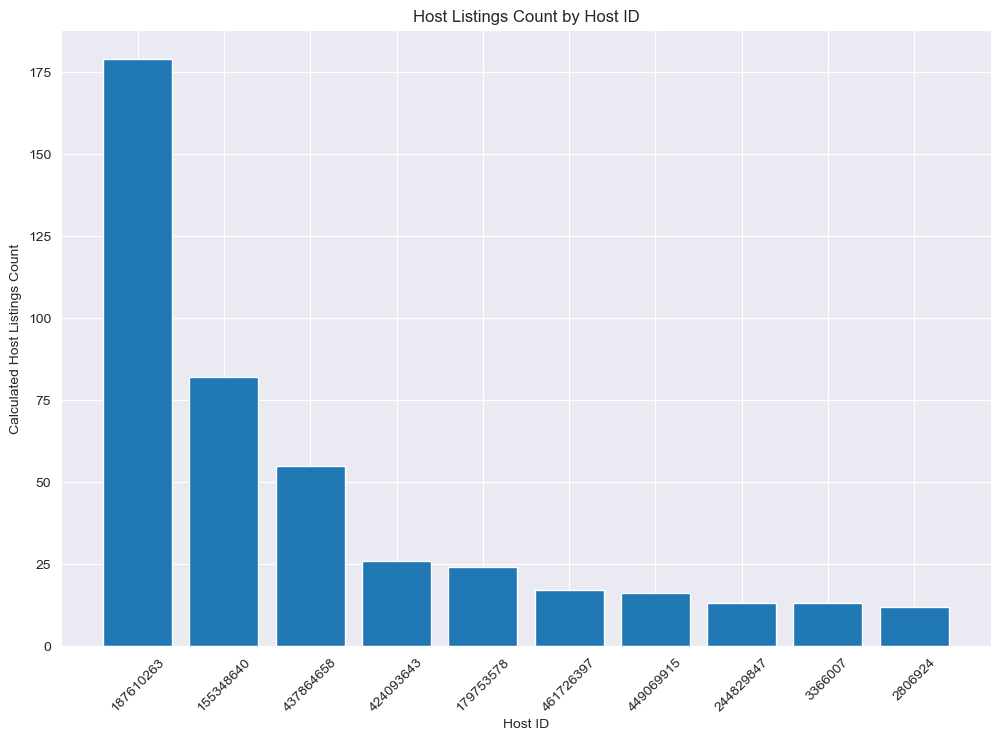

In [82]:
import matplotlib.pyplot as plt
import pandas as pd

grouped_data = data.groupby('host_id').first().reset_index()

grouped_data = grouped_data.sort_values('calculated_host_listings_count', ascending=False)

top_n = 10
grouped_data = grouped_data.head(top_n)

plt.figure(figsize=(12, 8))
plt.bar(grouped_data['host_id'].astype(str), grouped_data['calculated_host_listings_count'])
plt.xlabel('Host ID')
plt.ylabel('Calculated Host Listings Count')
plt.title('Host Listings Count by Host ID')
plt.xticks(rotation=45)
plt.show()



10. Do a descriptive analysis of the neighborhoods. Include information about room type in the analysis as well as one other self-chosen feature. The descriptive analysis should contain mean/average, mode, median, standard deviation/variance, minimum, maximum and quartiles.


11. Supply a list of the top 10 highest rated listings and visualize them on a map.

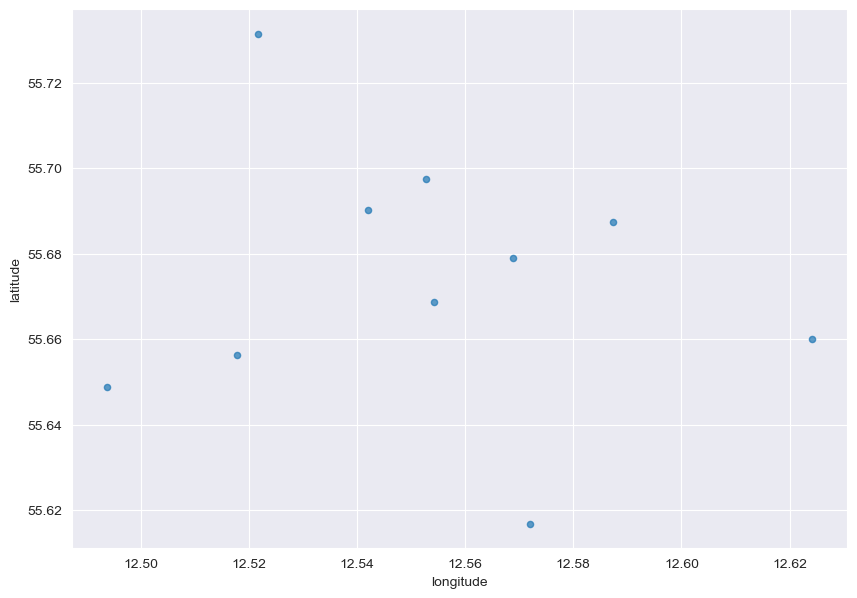

In [83]:
ten_highest_rated = data.sort_values(by = 'review_scores_rating', ascending=False).head(10);
ten_highest_rated.plot(kind="scatter", x="longitude", y="latitude", grid=True,alpha=0.7, cmap="jet", legend=True, sharex=False, figsize=(10, 7))
plt.show()

12. Now, use any preprocessing and feature engineering steps that you find relevant before proceeding (optional).

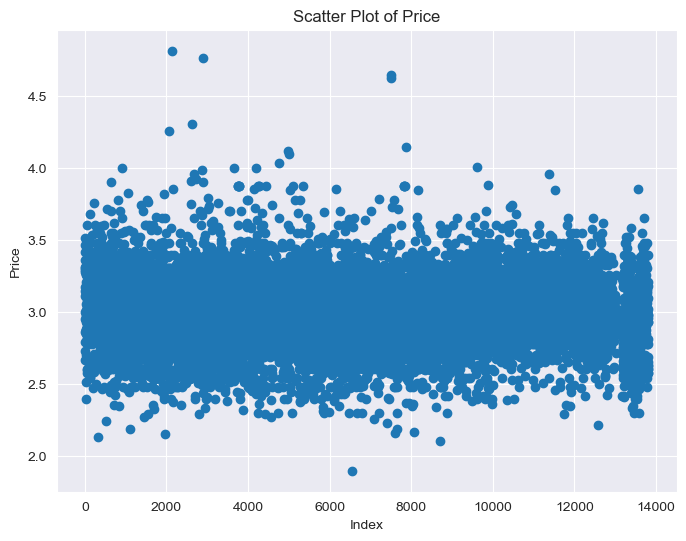

In [84]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.concat([data, pd.get_dummies(data['room_type'], prefix='room_type')], axis=1)
features = [
     'latitude', 'longitude',
    'minimum_nights',
    'review_scores_rating', 'number_of_reviews', 'reviews_per_month',
    'availability_365',
    'calculated_host_listings_count',
]

features += list(pd.get_dummies(data['room_type'], prefix='room_type').columns)

plt.figure(figsize=(8, 6))
plt.scatter(data.index, data['price'])
plt.title('Scatter Plot of Price')
plt.xlabel('Index')
plt.ylabel('Price')
plt.show()

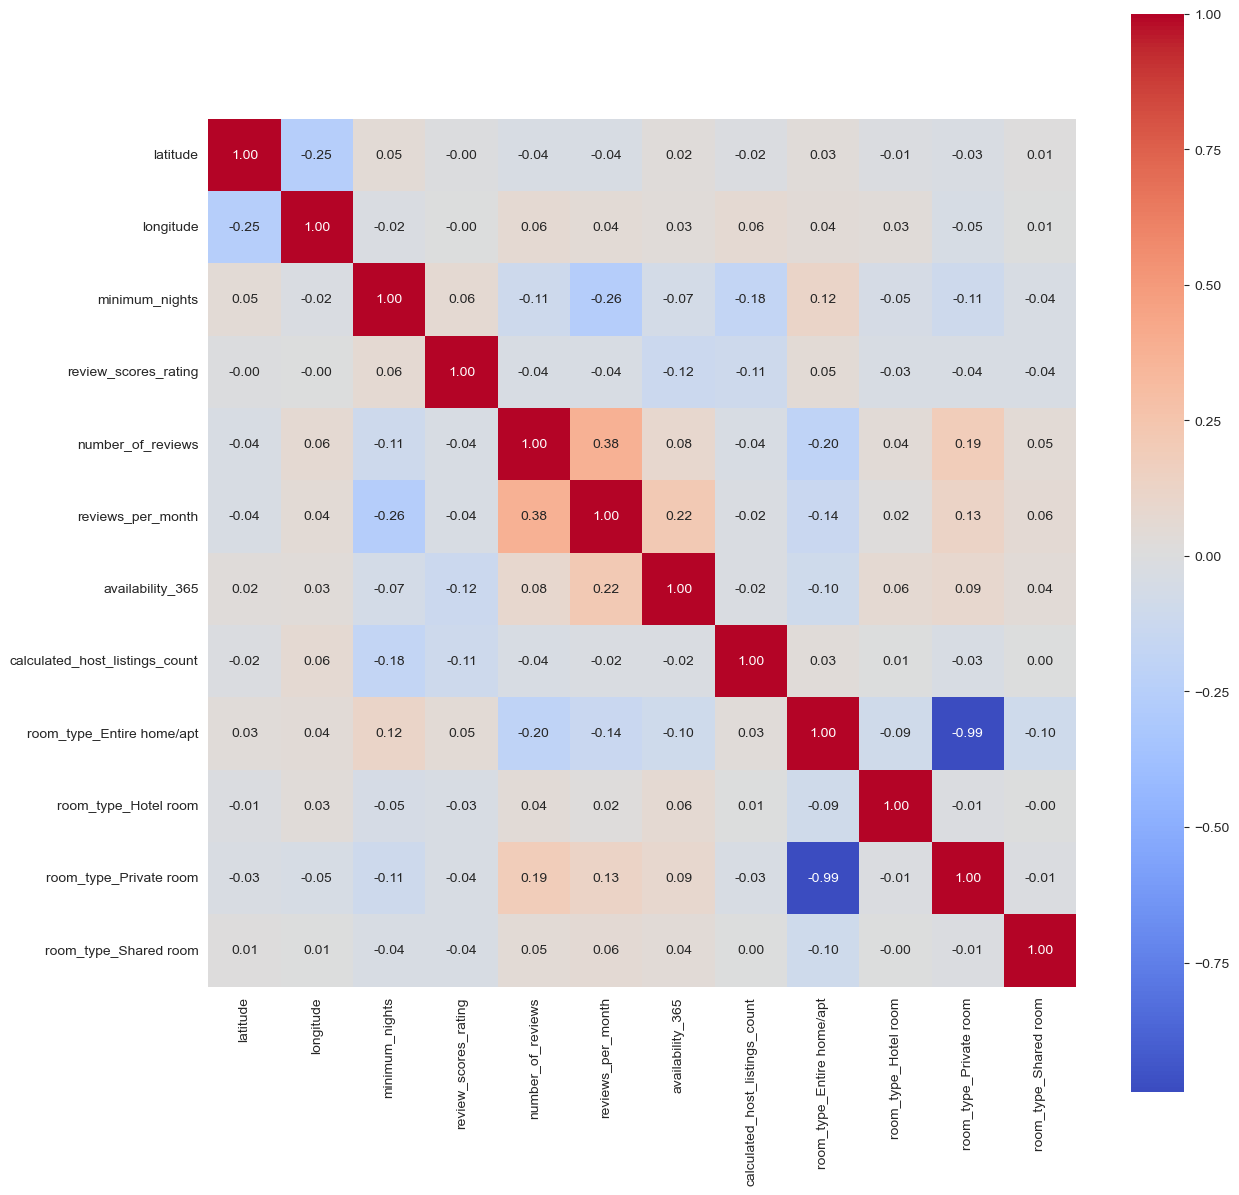

In [85]:
features_corr = data[features].corr()

plt.figure(figsize=(14, 14))
sns.heatmap(features_corr, annot=True, cmap='coolwarm', square=True, fmt='.2f')
plt.show()
threshold = 0.9

In [86]:
features.remove('room_type_Entire home/apt')

13. Create another new column, where the price is divided into two categories: "expensive" listings defined by all listings with a price higher than the median price, and "affordable" listings defined by all listings with a price equal to or below the median price. You can encode the affordable listings as "0" and the expensive ones as "1". All listings should now have a classification indicating either expensive listings (1) or affordable listings (0).

In [87]:
median_price = data['price'].median()
print(median_price)
data['price_category'] = np.where(data['price'] > median_price, 1, 0)
display(data.head(10))

2.9907826918031377


,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,log_price,price_bin,neighbourhood_cleansed_numeric,price_temp,minimum_nights_temp,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,price_category
0,6983,Copenhagen 'N Livin',16774,Simon,Nrrebro,55.686410,12.547410,Entire home/apt,2.953276,0.477121,...,6.801283,7,6,2.953276,0.477121,1,0,0,0,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,3.414973,0.602060,...,7.863651,8,5,3.414973,0.602060,1,0,0,0,1
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,3.511883,0.477121,...,8.086718,9,5,3.511883,0.477121,1,0,0,0,1
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,2.860338,0.845098,...,6.587550,7,9,2.860338,0.845098,1,0,0,0,0
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,3.290925,0.477121,...,7.578145,8,9,3.290925,0.477121,1,0,0,0,1
5,32379,"165 m2 artist flat on Vesterbro, with 2 bathr...",140105,Lise,Vesterbro-Kongens Enghave,55.672638,12.552493,Entire home/apt,3.107210,0.477121,...,7.155396,8,9,3.107210,0.477121,1,0,0,0,1
6,32841,Cozy flat for Adults/Quiet for kids,142143,Anders & Maria,sterbro,55.711760,12.570910,Entire home/apt,2.790285,2.000000,...,6.426488,7,10,2.790285,2.000000,1,0,0,0,0
7,33680,Best location on Vesterbro/Cph,145671,Mette,Vesterbro-Kongens Enghave,55.666310,12.545550,Entire home/apt,3.000000,0.778151,...,6.908755,7,9,3.000000,0.778151,1,0,0,0,1
8,37159,Unique space on greatest location,160390,Jeanette,Indre By,55.685470,12.565430,Entire home/apt,3.464788,0.698970,...,7.978311,8,5,3.464788,0.698970,1,0,0,0,1
9,38499,0 min. from everything in Cph.,122489,Christina,Indre By,55.684288,12.573019,Entire home/apt,3.278754,1.146128,...,7.550135,8,5,3.278754,1.146128,1,0,0,0,1


14. Based on self-chosen features, develop a Naïve Bayes and k-Nearest Neighbor model to determine whether a rental property should be classified as 0 or 1. Remember to divide your data into training data and test data. Comment on your findings.

Attempt with scaling

In [88]:
y = data['price_category']

X_train, X_test, y_train, y_test = train_test_split(data[features], y, random_state=42)
display(data[features].head(10))
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
display(X_train_scaled)

# Naïve Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
nb_predictions = nb_model.predict(X_test_scaled)

# k-Nearest Neighbor model
N = len(data)
k = int(60)

knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train_scaled, y_train)
knn_predictions = knn_model.predict(X_test_scaled)

print("Naïve Bayes Performance:")
print("Accuracy:", accuracy_score(y_test, nb_predictions))
print(classification_report(y_test, nb_predictions))

print("k-Nearest Neighbor Performance:")
print("K:", k)
print("Accuracy:", accuracy_score(y_test, knn_predictions))
print(classification_report(y_test, knn_predictions))


,latitude,longitude,minimum_nights,review_scores_rating,number_of_reviews,reviews_per_month,availability_365,calculated_host_listings_count,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,55.686410,12.547410,0.477121,4.78,172,1.08,0,1,0,0,0
1,55.693070,12.576490,0.602060,4.91,59,0.55,303,1,0,0,0
2,55.676020,12.575400,0.477121,4.53,300,2.06,56,3,0,0,0
3,55.670230,12.555040,0.845098,4.92,24,0.16,59,1,0,0,0
4,55.666602,12.555283,0.477121,4.88,19,0.13,0,1,0,0,0
5,55.672638,12.552493,0.477121,4.90,80,0.54,60,2,0,0,0
6,55.711760,12.570910,2.000000,4.57,7,0.05,281,1,0,0,0
7,55.666310,12.545550,0.778151,4.74,71,0.48,312,1,0,0,0
8,55.685470,12.565430,0.698970,5.00,11,0.07,0,1,0,0,0
9,55.684288,12.573019,1.146128,5.00,15,0.10,87,1,0,0,0


array([[-2.10245528,  0.73843904, -0.5012147 , ..., -0.03317886,
        -0.35149439, -0.03634962],
       [ 0.04226715,  0.6742631 , -1.48018364, ..., -0.03317886,
        -0.35149439, -0.03634962],
       [ 0.09434049,  0.15166328,  0.07144542, ..., -0.03317886,
        -0.35149439, -0.03634962],
       ...,
       [-0.86808225, -1.24614441,  0.07144542, ..., -0.03317886,
        -0.35149439, -0.03634962],
       [ 0.62273884, -0.75633512,  0.07144542, ..., -0.03317886,
        -0.35149439, -0.03634962],
       [-0.41441658, -0.50809224,  0.47775424, ..., -0.03317886,
        -0.35149439, -0.03634962]])

Naïve Bayes Performance:
Accuracy: 0.6104881266490765
              precision    recall  f1-score   support

           0       0.82      0.27      0.41      1494
           1       0.57      0.94      0.71      1538

    accuracy                           0.61      3032
   macro avg       0.69      0.61      0.56      3032
weighted avg       0.69      0.61      0.56      3032

k-Nearest Neighbor Performance:
K: 60
Accuracy: 0.712730870712401
              precision    recall  f1-score   support

           0       0.71      0.70      0.71      1494
           1       0.71      0.73      0.72      1538

    accuracy                           0.71      3032
   macro avg       0.71      0.71      0.71      3032
weighted avg       0.71      0.71      0.71      3032


15. Try to come up with a final conclusion to the Airbnb-Copenhagen assignment.

This project involves analyzing the latest Airbnb listings in Copenhagen, sourced from Airbnb. Before implementing the tasks, the data requires preprocessing. Throughout this project, we went into various aspects of Machine Learning, including feature extraction, data cleaning, and model training. Our models achieved an accuracy of approximately 70%, indicating good performance. We utilized the 'wordcloud' Python package for this project, enabling us to create a wordcloud visualization. A potential improvement would be to integrate an actual map of Copenhagen, rather than only plotting data points on an x,y graph via its latitude and longitude, to more accurately show the exact locations of apartments in Copenhagen.